In [242]:
import matplotlib.pyplot as plt
import numpy as np

### Setup Data

In [243]:
example_data = np.random.rand(12,3)*100
times = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tags = ['Groceries', 'PTV', 'Climbing']
print(example_data)

[[ 5.12929994 20.33749841 24.92237707]
 [94.97519187 44.60154097 97.72873624]
 [61.61805448 67.69539292  3.51246093]
 [52.03893533 58.55555612 29.86390546]
 [60.09000461 59.23412753 88.33066612]
 [89.28842363  9.59994326 70.78891317]
 [89.34092094 72.9534502  56.57348246]
 [12.02408603 39.36753567 29.34656111]
 [30.77164158 70.34687144 48.71987452]
 [10.40085439  1.39546801 67.14126018]
 [42.91139284 61.28626862 34.19399284]
 [73.61590167 22.48672849 44.65090701]]


### Column Graphs

In [271]:
def set_plot_labels(ax, title, ylabel=None, xticks=None):
    if ax is plt:
        ax.title(title)
        if ylabel:
            ax.ylabel(ylabel)
        if xticks:
            ax.xticks(range(len(xticks)), xticks)
    else:
        ax.set_title(title)
        if ylabel:
            ax.set_ylabel(ylabel)
        if xticks:
            ax.set_xticklabels(xticks)

def stacked_column(data, ax=plt, title='title', ylabel='Y', xticks=None, tags=None, 
                   relative=False, show=False, **kwargs):
    ''' Creates an absolute or relative stacked column graph, on the given axis. '''
    if relative:
        data = data / np.sum([data],axis=2).T
    indices = np.arange(len(data))
    plots = []
    plots.append(ax.bar(indices, data[:,0], **kwargs))
    for col in range(1, len(data[0])):
        plots.append(ax.bar(indices, data[:,col], 
                            bottom=data[:,:col].sum(axis=1), **kwargs))
    
    set_plot_labels(ax, title, ylabel, xticks)
    if tags:
        ax.legend((p[0] for p in plots), tags)
    if show:
        plt.tight_layout()
        plt.show()

##### Absolute

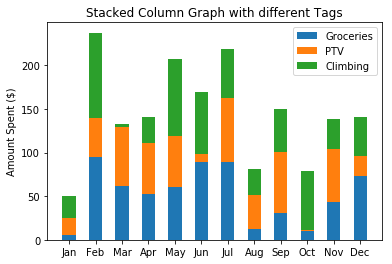

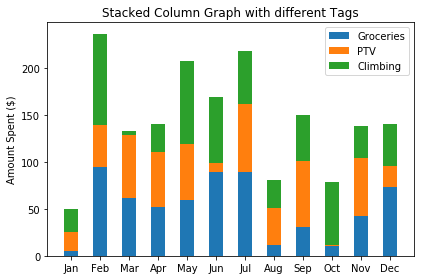

In [259]:
ylabel = 'Amount Spent ($)'
title = 'Stacked Column Graph with different Tags'
N = len(example_data)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
plots = []
plots.append(plt.bar(ind, example_data[:,0], width))
for col in range(1,len(example_data[0])):
    plots.append(plt.bar(ind, example_data[:,col], width, 
                         bottom=example_data[:,:col].sum(axis=1)))

plt.ylabel(ylabel)
plt.title(title)
plt.xticks(ind, times)
plt.legend((p[0] for p in plots), tags)

plt.show()

stacked_column(example_data, ylabel=ylabel, title=title, xticks=times, tags=tags,
               show=True, width=width)

##### Percentage

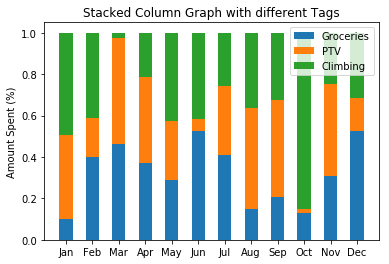

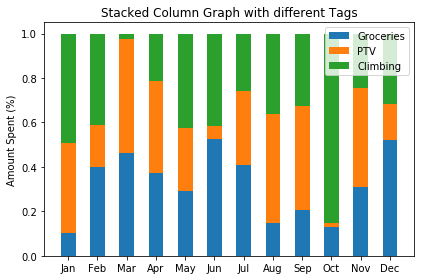

In [273]:
# normalise data
example_data_norm = example_data / np.sum([example_data], axis=2).T
ylabel = 'Amount Spent (%)'
title = 'Stacked Column Graph with different Tags'
plots = []
plots.append(plt.bar(ind, example_data_norm[:,0], width))
for col in range(1,len(example_data_norm[0])):
    plots.append(plt.bar(ind, example_data_norm[:,col], width, 
                         bottom=example_data_norm[:,:col].sum(axis=1)))

plt.ylabel(ylabel)
plt.title(title)
plt.xticks(ind, times)
plt.legend((p[0] for p in plots), tags)

plt.show()

stacked_column(example_data, ylabel=ylabel, title=title, xticks=times, tags=tags,
               show=True, relative=True, width=width)

### Cumulative Line Graph

In [247]:
def cumulative_line(data, ax=plt, ylabel='Y', title='title', xticks=None, tags=None, 
                    precomputed=False, show=False, **kwargs):
    ''' Creates a cumulative line graph for each tag, on the given axis. '''
    indices = np.arange(len(data))
    if not precomputed:
        data = data.copy()
        for timestep in range(1, len(data)):
            data[timestep] += data[timestep-1]
            
    ax.plot(indices, data)
    set_plot_labels(ax, title, ylabel, xticks)
    if tags:
        ax.legend(tags)
    if show:
        plt.tight_layout()
        plt.show()
    
    return data

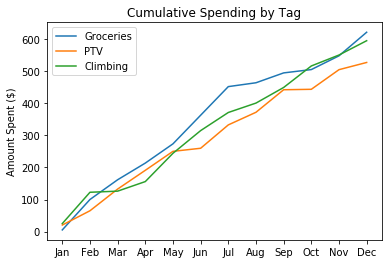

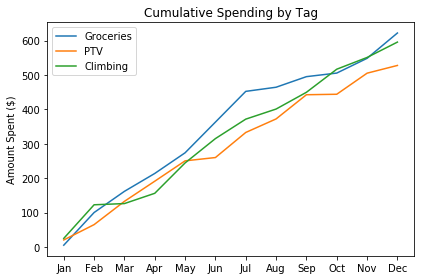

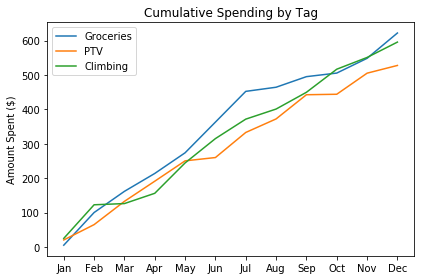

array([[  5.12929994,  20.33749841,  24.92237707],
       [100.10449182,  64.93903938, 122.65111331],
       [161.72254629, 132.6344323 , 126.16357424],
       [213.76148163, 191.18998842, 156.0274797 ],
       [273.85148623, 250.42411594, 244.35814582],
       [363.13990986, 260.02405921, 315.14705899],
       [452.48083079, 332.9775094 , 371.72054145],
       [464.50491682, 372.34504508, 401.06710256],
       [495.2765584 , 442.69191652, 449.78697708],
       [505.67741278, 444.08738452, 516.92823726],
       [548.58880563, 505.37365314, 551.1222301 ],
       [622.2047073 , 527.86038163, 595.77313711]])

In [248]:
ylabel = 'Amount Spent ($)'
title = 'Cumulative Spending by Tag'

example_data_cum = example_data.copy()
for month in range(1, len(example_data_cum)):
    example_data_cum[month] += example_data_cum[month-1]

plt.plot(ind, example_data_cum)
plt.ylabel(ylabel)
plt.title(title)
plt.xticks(ind, times)
plt.legend(tags)

plt.show()

cumulative_line(example_data, ylabel=ylabel, title=title, xticks=times, tags=tags, show=True)

cumulative_line(example_data_cum, ylabel=ylabel, title=title, xticks=times, tags=tags, show=True, precomputed=True)

### Pie Graph

In [253]:
def pie(data, labels, ax=plt, title='title', autopct='%1.1f%%',
        show=False, **kwargs):
    ''' Creates a pie chart of the given data. '''
    
    ax.pie(data, labels=tags, autopct=autopct)
    set_plot_labels(ax, title)
    if show:
        plt.tight_layout()
        plt.show()

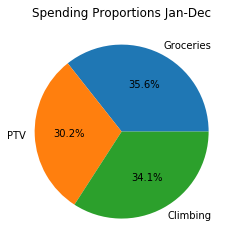

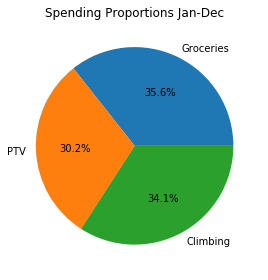

In [254]:
title = 'Spending Proportions {}-{}'.format(times[0], times[-1])

plt.pie(example_data_cum[-1], labels=tags, autopct='%1.1f%%')
plt.title(title)
plt.show()

pie(example_data_cum[-1], labels=tags, title=title, show=True)

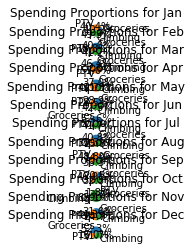

In [251]:
fig, axs = plt.subplots(len(example_data),1)
for index, ax in enumerate(axs):
    title='Spending Proportions for {}'.format(times[index])
    pie(example_data[index], labels=tags, ax=ax, title=title, 
        show=False)
plt.show()

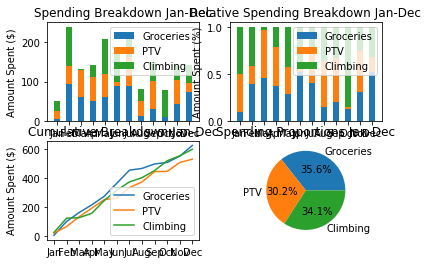

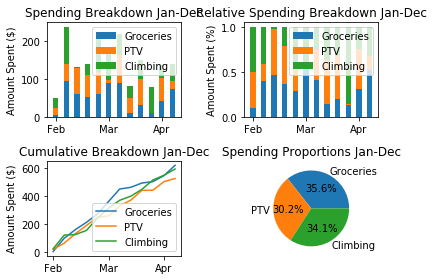

In [277]:
time_period = '{}-{}'.format(times[0], times[-1])
abs_title = 'Spending Breakdown ' + time_period
abs_ylabel = 'Amount Spent ($)'
rel_title = 'Relative Spending Breakdown ' + time_period
rel_ylabel = 'Amount Spent (%)'
cum_title = 'Cumulative Breakdown ' + time_period
prop_title = 'Spending Proportions ' + time_period

plt.subplot(2,2,1)
stacked_column(example_data, ylabel=abs_ylabel, title=abs_title, 
               xticks=times, tags=tags, width=width)
plt.subplot(2,2,2)
stacked_column(example_data, ylabel=rel_ylabel, title=rel_title, 
               xticks=times, tags=tags, relative=True, width=width)
plt.subplot(2,2,3)
cum_data = cumulative_line(example_data, ylabel=abs_ylabel, title=cum_title, 
                           xticks=times, tags=tags)[-1]
plt.subplot(2,2,4)
pie(cum_data, labels=tags, title=prop_title)

fig, axs = plt.subplots(2,2)
stacked_column(example_data, ax=axs[0,0], ylabel=abs_ylabel, title=abs_title, 
               xticks=times, tags=tags, width=width)
stacked_column(example_data, ax=axs[0,1], ylabel=rel_ylabel,
               title=rel_title, xticks=times, tags=tags,
               relative=True, width=width)
cum_data = cumulative_line(example_data, ax=axs[1,0], ylabel=abs_ylabel, 
                           title=cum_title, xticks=times, tags=tags)[-1]
pie(cum_data, ax=axs[1,1], labels=tags, title=prop_title, show=True)